In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import itertools
from matplotlib.colors import ListedColormap
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.cross_validation import train_test_split
from numpy import concatenate
from numpy import sqrt,power,sum
import operator
from collections import defaultdict
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.set(style='white',palette='deep')


/Users/yigitozgumus/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Dataset Import

In [2]:
cols = ['index','features']
feature_labels =  pd.read_csv('Data/UCI Har Dataset/features.txt', sep='\s+', header=None, skiprows=0,names=cols)
features = feature_labels.features.tolist()
activity_labels = pd.read_csv('Data/UCI Har Dataset/activity_labels.txt', sep='\s+', header=None, skiprows=0,names=cols)
activities = activity_labels.features.tolist()

## General train and test data import

In [3]:
train_X = pd.read_csv('Data/UCI Har Dataset/train/X_train.txt', sep='\s+', header=None, skiprows=0,names=features)
train_y = pd.read_csv('Data/UCI Har Dataset/train/y_train.txt', sep='\s+', header=None, skiprows=0,names=['actions'])
test_X = pd.read_csv('Data/UCI Har Dataset/test/X_test.txt', sep='\s+', header=None, skiprows=0,names=features)
test_y = pd.read_csv('Data/UCI Har Dataset/test/y_test.txt', sep='\s+', header=None, skiprows=0,names=['actions'])

## Inertia signals train and test data

In [11]:
import glob
path =r'Data/UCI HAR Dataset/train/Inertial Signals' # use your path
allFiles = glob.glob(path + "/*.txt")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,sep='\s+', header=None, skiprows=0)
    list_.append(df)
frame = list_

In [5]:
feature_labels.head()
activity_labels.head()
train_X.head()
train_y.head()
train_X.describe()

,index,features
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


,index,features
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


,actions
0,5
1,5
2,5
3,5
4,5


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


## PCA and LDA for Dimentionality Reduction

In [38]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
pca = PCA(n_components=5)
X_r = pca.fit(train_X.as_matrix()).transform(train_X.as_matrix())

In [40]:
lda = LinearDiscriminantAnalysis(n_components=5)
X_r2 = lda.fit(train_X.as_matrix(), train_y.as_matrix()).transform(train_X.as_matrix())
target_names = activity_labels['features'].tolist()

explained variance ratio (first two components): [ 0.6255444   0.04913023  0.04121467  0.01874956  0.0169486 ]


/Users/yigitozgumus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/Users/yigitozgumus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


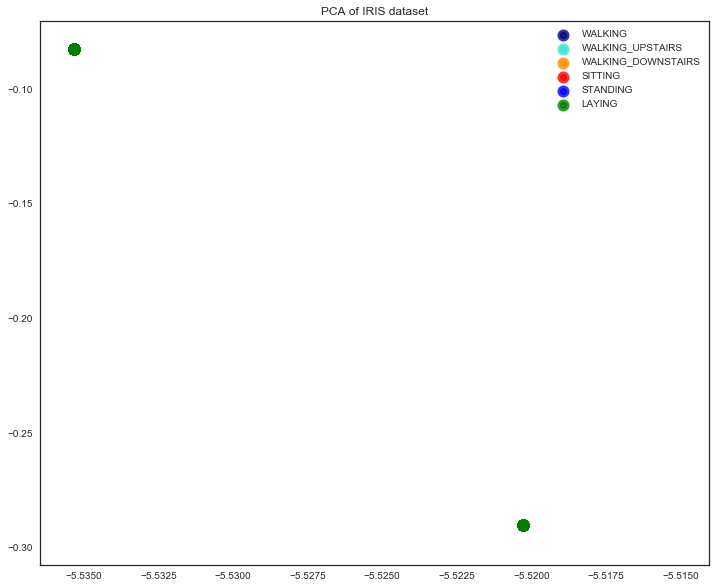

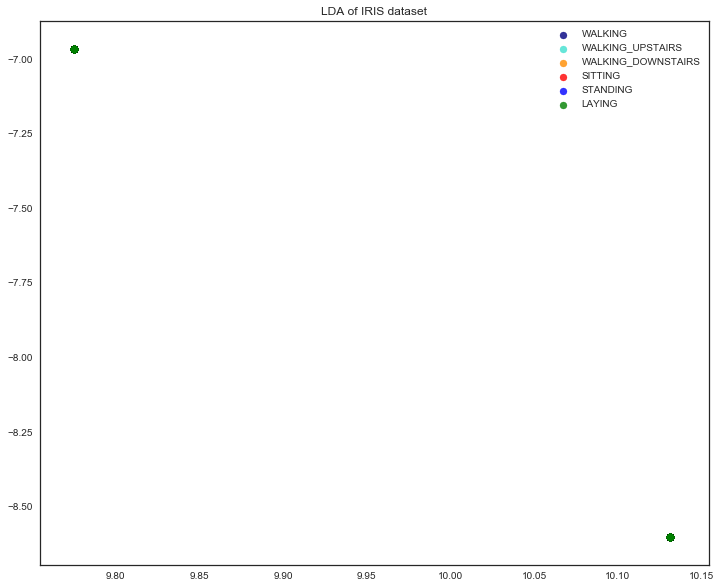

In [41]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
plt.figure(figsize=(12,10 ))
colors = ['navy', 'turquoise', 'darkorange','red','blue','green']
lw = 5

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(X_r[train_y == i, 0], X_r[train_y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
plt.figure(figsize=(12,10 ))
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], target_names):
    plt.scatter(X_r2[train_y == i, 0], X_r2[train_y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [83]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(train_X)
from ipykernel import kernelapp as app

In [85]:
t2 = train_y.as_matrix()
Y_sklearn[t2 == 1].size

/Users/yigitozgumus/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
  from ipykernel import kernelapp as app


1226

In [86]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 10))
    for lab, col in zip(('1','2','3','4','5','6'),
                        ('blue', 'red', 'green','navy', 'turquoise', 'darkorange')):
        plt.scatter(Y_sklearn[t2==int(lab), 0],
                    Y_sklearn[t2==int(lab), 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

IndexError: too many indices for array